In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('house_data.csv', index_col = 0)

In [4]:
x = data['sqft_living'].values.reshape([-1,1])
y = data['price'].values.reshape([-1,1])

In [46]:
X_train = x[:17292]
Y_train = y[:17292]

X_test = x[17292:]
Y_test = y[17292:]

In [74]:
c1 = np.random.normal()
c2 = np.random.normal()
LR = 0.000000001
m = 1000
print(c1, c2)

-1.0221756578782661 1.8263351445252336
[[1180]
 [2570]
 [ 770]
 ...
 [3420]
 [2270]
 [2270]]


In [76]:
for i in range(m):
    Y_pred = getY_pred(c1, c2, X_train)
    c1 = c1 - LR * getC0(Y_pred, Y_train)
    c2 = c2 - LR * getC1(Y_pred, X_train, Y_train)
    mse = getMse(Y_pred, Y_train)
    print(mse)
    
print(c1, c2)

206703179133.2861
204970054416.37595
203254343469.695
201555871326.38095
199874464777.5713
198209952354.7394
196562164312.2086
194930932609.8413
193316090895.90265
191717474490.0959
190134920366.76865
188568267138.28748
187017355038.57983
185482025906.84116
183962123171.40576
182457491833.7799
180967978452.83496
179493431129.15976
178033699489.56998
176588634671.7731
175158089309.1878
173741917515.91534
172339974871.86234
170952118408.01294
169578206591.84912
168218099312.91684
166871657868.53818
165538744949.66635
164219224626.88293
162912962336.53607
161619824867.0177
160339680345.17868
159072398222.8806
157817849263.68246
156575905529.6613
155346440368.36508
154129328399.89706
152924445504.1293
151731668808.04523
150550876673.209
149381948683.36096
148224765632.13782
147079209510.91574
145945163496.7763
144822511940.59274
143711140355.23624
142610935403.9006
141521784888.5442
140443577738.44818
139376203998.8896
138319554819.92813
137273522445.3058
136238000201.45819
135212882486.63

35566074481.897865
35552469536.7461
35539001288.847244
35525668364.71988
35512469404.68282
35499403062.71647
35486468006.325455
35473662916.40285
35460986487.09557
35448437425.6713
35436014452.386536
35423716300.35618
35411541715.4243
35399489456.03625
35387558293.11202
35375747009.92095
35364054401.95763
35352479276.819016
35341020454.08289
35329676765.18747
35318447053.312256
35307330173.25998
35296324991.339905
35285430385.2522
35274645243.973434
35263968467.64333
35253398967.4526
35242935665.53187
35232577494.841774
35222323399.06419
35212172332.49442
35202123259.93465
35192175156.5883
35182327007.955574
35172577809.72997
35162926567.69589
35153372297.62721
35143914025.18692
35134550785.82782
35125281624.69404
35116105596.52381
35107021765.55294
35098029205.41944
35089126999.06908
35080314238.6618
35071590025.47917
35062953469.83279
35054403690.97343
35045939817.001335
35037560984.777275
35029266339.834465
35021055036.29151
35012926236.766106
35004879112.28962
34996912842.22259
349

34219416773.43847
34219342526.39294
34219269025.35249
34219196262.821556
-0.9242142629020608 261.8660416381069


34796003604.00675
-0.9242142629020608 261.8660416381069


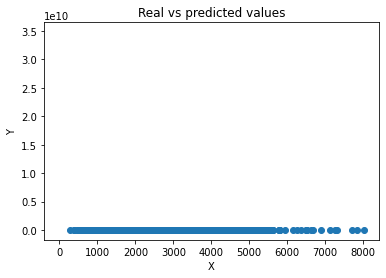

In [80]:
Y_pred = c1 + c2 * X_test 
mse = getMse(Y_pred, Y_test)
print(mse)  
print(c1, c2)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Real vs predicted values")
plt.scatter(X_test,Y_test)
plt.plot(mse)

In [75]:
def getY_pred(c1, c2, x):
    mul = np.dot(c2, x)
    summ = np.add(c1, mul)
    return summ

def getC0(y_pred, y):
    sub = y_pred - y
    div = (np.sum(sub))
    return np.divide(np.sum(sub), len(y))

def getC1(y_pred, x, y):
    sub = np.subtract(y_pred,y)
    mul = np.multiply(sub, x)
    return np.divide(np.sum(mul), len(y))

def getMse(y_pred, y):
    sub = np.subtract(y_pred,y)
    power = np.square(sub)
    summ = np.sum(power)
    return np.divide(summ , 2 * len(y))